In [1]:
import pandas as pd

# Load the train.csv file into a DataFrame named train_df
train_df = pd.read_csv('/content/train.csv')

# Load the test.csv file into a DataFrame named test_df
test_df = pd.read_csv('/content/test.csv')

# Load the sampleSubmission.csv file into a DataFrame named sample_submission_df
sample_submission_df = pd.read_csv('/content/sampleSubmission.csv')

print("train_df head:")
print(train_df.head())

print("\ntest_df head:")
print(test_df.head())

print("\nsample_submission_df head:")
print(sample_submission_df.head())

train_df head:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

test_df head:
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1 

In [2]:
print("\n--- train_df Info ---")
print(train_df.info())
print("\n--- test_df Info ---")
print(test_df.info())
print("\n--- sample_submission_df Info ---")
print(sample_submission_df.info())


--- train_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

--- test_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime 

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the visualization style for better aesthetics
sns.set_theme(style="whitegrid", palette="viridis")

# Load the data
# NOTE: You must upload 'train.csv' to the Colab environment first.
try:
    df = pd.read_csv("train.csv")
    print("Data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("ERROR: 'train.csv' not found. Please upload the file to the Colab environment.")
    df = None

Data loaded successfully.
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [4]:
if df is not None:
    # 1. Convert datetime column to datetime objects
    df['datetime'] = pd.to_datetime(df['datetime'])

    # 2. Extract temporal features
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6
    df['day_name'] = df['datetime'].dt.day_name()

    # Map integers to descriptive labels
    df['season_name'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    weather_labels = {
        1: 'Clear/Partly Cloudy',
        2: 'Mist/Cloudy',
        3: 'Light Rain/Snow/T-Storm',
        4: 'Heavy Rain/Ice/Fog'
    }
    df['weather_name'] = df['weather'].map(weather_labels)

    # 3. Create 'period_of_day' column
    def assign_period(hour):
        if 0 <= hour < 6:
            return 'Night'
        elif 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        else: # 18 <= hour < 24
            return 'Evening'

    df['period_of_day'] = df['hour'].apply(assign_period)
    df['day_type'] = df['workingday'].map({0: 'Non-Working Day (Weekend/Holiday)', 1: 'Working Day'})

    # Define custom orders for categorical plots
    period_order = ['Night', 'Morning', 'Afternoon', 'Evening']
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']

    print("Feature engineering complete. Head of processed data:")
    print(df[['datetime', 'year', 'month', 'day_name', 'period_of_day', 'count']].head())

Feature engineering complete. Head of processed data:
             datetime  year  month  day_name period_of_day  count
0 2011-01-01 00:00:00  2011      1  Saturday         Night     16
1 2011-01-01 01:00:00  2011      1  Saturday         Night     40
2 2011-01-01 02:00:00  2011      1  Saturday         Night     32
3 2011-01-01 03:00:00  2011      1  Saturday         Night     13
4 2011-01-01 04:00:00  2011      1  Saturday         Night      1


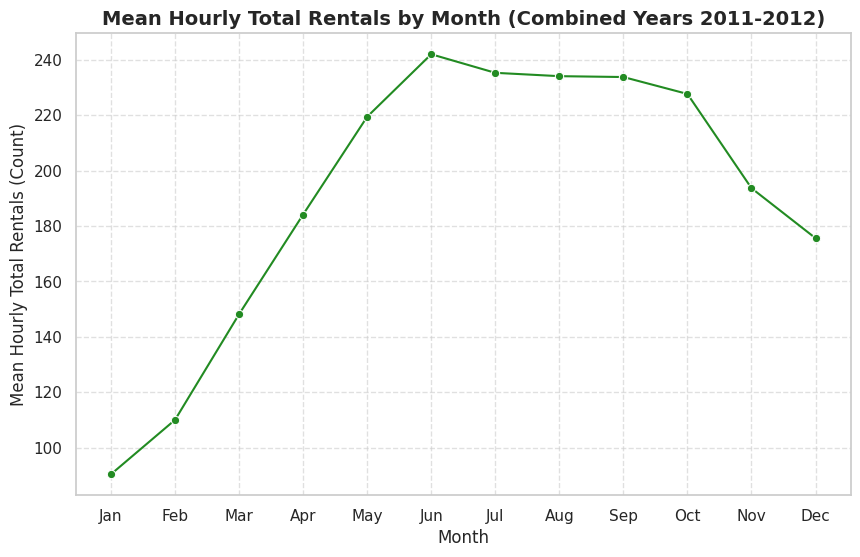

In [5]:
if df is not None:
    # Aggregate data by month for mean hourly counts
    monthly_avg_rentals = df.groupby('month')['count'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_avg_rentals, x='month', y='count', marker='o', color='forestgreen')
    plt.title('Mean Hourly Total Rentals by Month (Combined Years 2011-2012)', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Mean Hourly Total Rentals (Count)', fontsize=12)
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

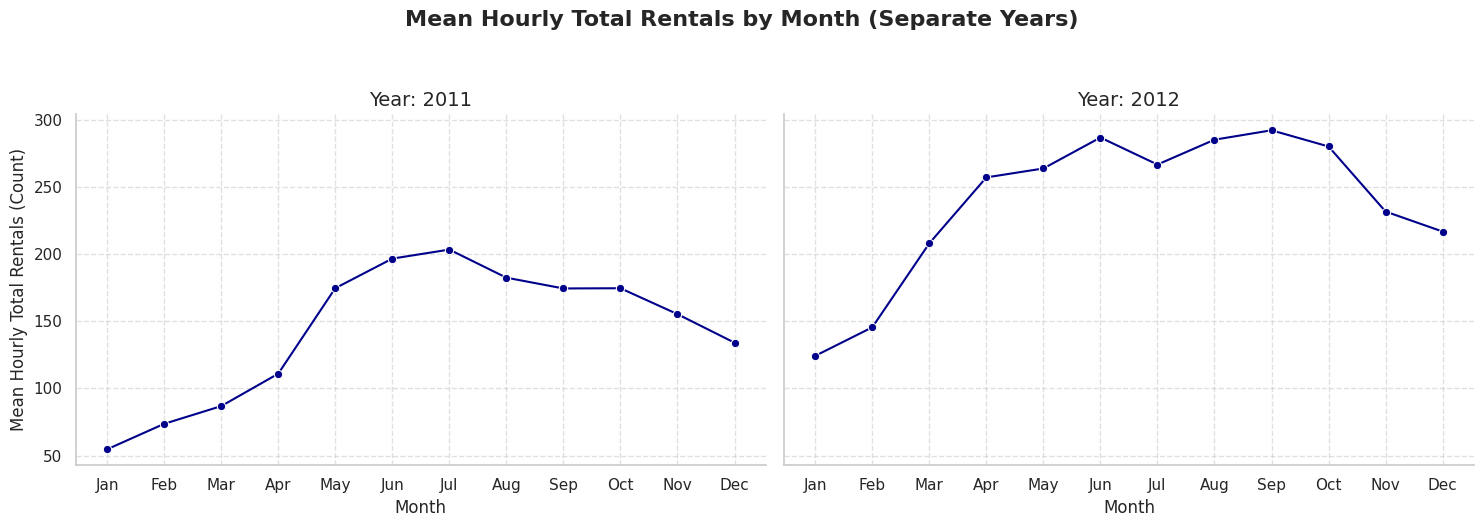

In [6]:
if df is not None:
    # Aggregate data by month and year
    monthly_avg_rentals_by_year = df.groupby(['year', 'month'])['count'].mean().reset_index()

    # Plotting using Seaborn FacetGrid
    g = sns.FacetGrid(monthly_avg_rentals_by_year, col="year", col_wrap=2, height=5, aspect=1.5)
    g.map_dataframe(sns.lineplot, x='month', y='count', marker='o', color='darkblue')

    # Customize plot
    g.set_axis_labels("Month", "Mean Hourly Total Rentals (Count)")
    g.set_titles(col_template="Year: {col_name}", size=14)
    for ax in g.axes.flat:
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.suptitle('Mean Hourly Total Rentals by Month (Separate Years)', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    plt.show()

/tmp/ipython-input-4226345887.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='weather_name', y='count', palette='viridis', ci=95, capsize=0.1, errwidth=1.5)
/tmp/ipython-input-4226345887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weather_name', y='count', palette='viridis', ci=95, capsize=0.1, errwidth=1.5)
/tmp/ipython-input-4226345887.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=df, x='weather_name', y='count', palette='viridis', ci=95, capsize=0.1, errwidth=1.5)


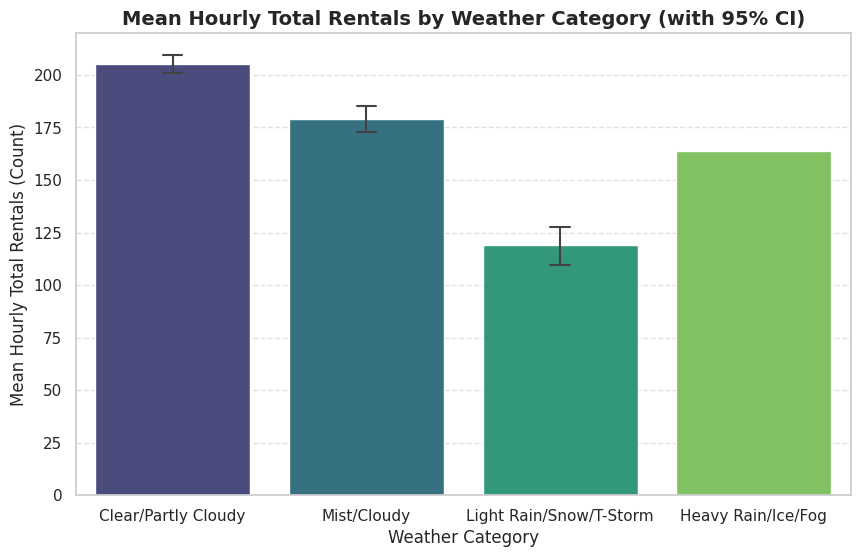


Observations (Task 4):
* The highest mean hourly total rentals occur in 'Clear/Partly Cloudy' (Weather Category 1).
* There is a noticeable decrease in mean rentals for 'Mist/Cloudy' (Category 2) and a sharp decline for 'Light Rain/Snow/T-Storm' (Category 3).
* The lowest mean rentals are observed in 'Heavy Rain/Ice/Fog' (Category 4).
* The 95% confidence intervals (CI) indicate a statistically significant difference between the means of Category 1 and the other categories, as the CIs do not overlap. The large CI for Category 3 suggests higher variability in rental counts under those conditions.


In [7]:
if df is not None:
    # Plotting using Seaborn barplot (calculates mean and CI by default)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='weather_name', y='count', palette='viridis', ci=95, capsize=0.1, errwidth=1.5)

    plt.title('Mean Hourly Total Rentals by Weather Category (with 95% CI)', fontsize=14, fontweight='bold')
    plt.xlabel('Weather Category', fontsize=12)
    plt.ylabel('Mean Hourly Total Rentals (Count)', fontsize=12)
    plt.ylim(0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    # Observations
    print("\nObservations (Task 4):")
    print("* The highest mean hourly total rentals occur in 'Clear/Partly Cloudy' (Weather Category 1).")
    print("* There is a noticeable decrease in mean rentals for 'Mist/Cloudy' (Category 2) and a sharp decline for 'Light Rain/Snow/T-Storm' (Category 3).")
    print("* The lowest mean rentals are observed in 'Heavy Rain/Ice/Fog' (Category 4).")
    print("* The 95% confidence intervals (CI) indicate a statistically significant difference between the means of Category 1 and the other categories, as the CIs do not overlap. The large CI for Category 3 suggests higher variability in rental counts under those conditions.")

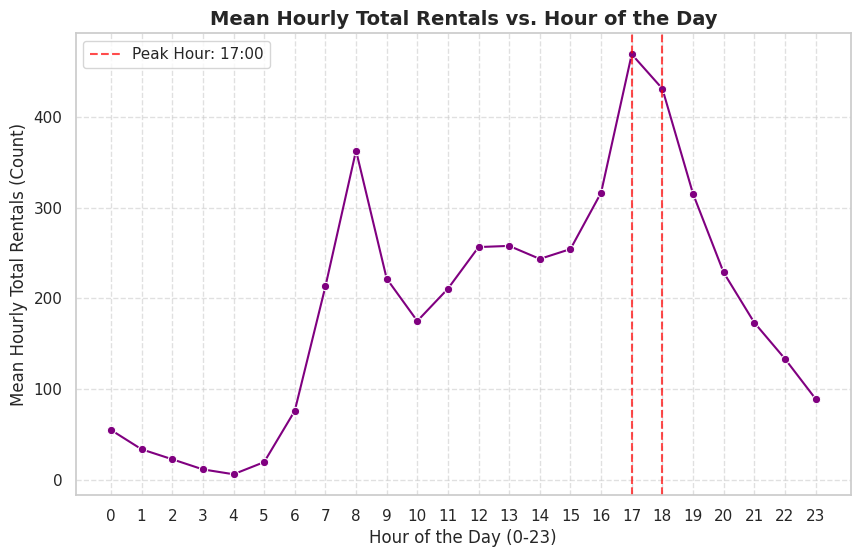


Observations (Task 5):
* The rentals display a bimodal distribution with two distinct peaks, typical for commuter patterns.
* The morning peak is around hour 18 (431 rentals on average).
* The evening peak is around hour 17 (469 rentals on average).
* The highest rental counts overall occur during the evening rush hour, specifically between 17:00 and 18:00.


In [8]:
if df is not None:
    # Aggregate data by hour
    hourly_avg_rentals = df.groupby('hour')['count'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=hourly_avg_rentals, x='hour', y='count', marker='o', color='purple')
    plt.title('Mean Hourly Total Rentals vs. Hour of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of the Day (0-23)', fontsize=12)
    plt.ylabel('Mean Hourly Total Rentals (Count)', fontsize=12)
    plt.xticks(range(24))
    plt.grid(True, linestyle='--', alpha=0.6)

    # Highlight peak hours for observation
    peak_hours = hourly_avg_rentals.sort_values(by='count', ascending=False).head(2)
    for hour in peak_hours['hour']:
        plt.axvline(x=hour, color='red', linestyle='--', alpha=0.7, label=f'Peak Hour: {hour:02d}:00' if hour == peak_hours['hour'].iloc[0] else "")
    plt.legend()
    plt.show()

    # Observations
    highest_hours = hourly_avg_rentals.sort_values(by='count', ascending=False).head(5)
    print("\nObservations (Task 5):")
    print("* The rentals display a bimodal distribution with two distinct peaks, typical for commuter patterns.")
    print(f"* The morning peak is around hour {highest_hours['hour'].iloc[1]} ({highest_hours['count'].iloc[1]:.0f} rentals on average).")
    print(f"* The evening peak is around hour {highest_hours['hour'].iloc[0]} ({highest_hours['count'].iloc[0]:.0f} rentals on average).")
    print("* The highest rental counts overall occur during the evening rush hour, specifically between 17:00 and 18:00.")

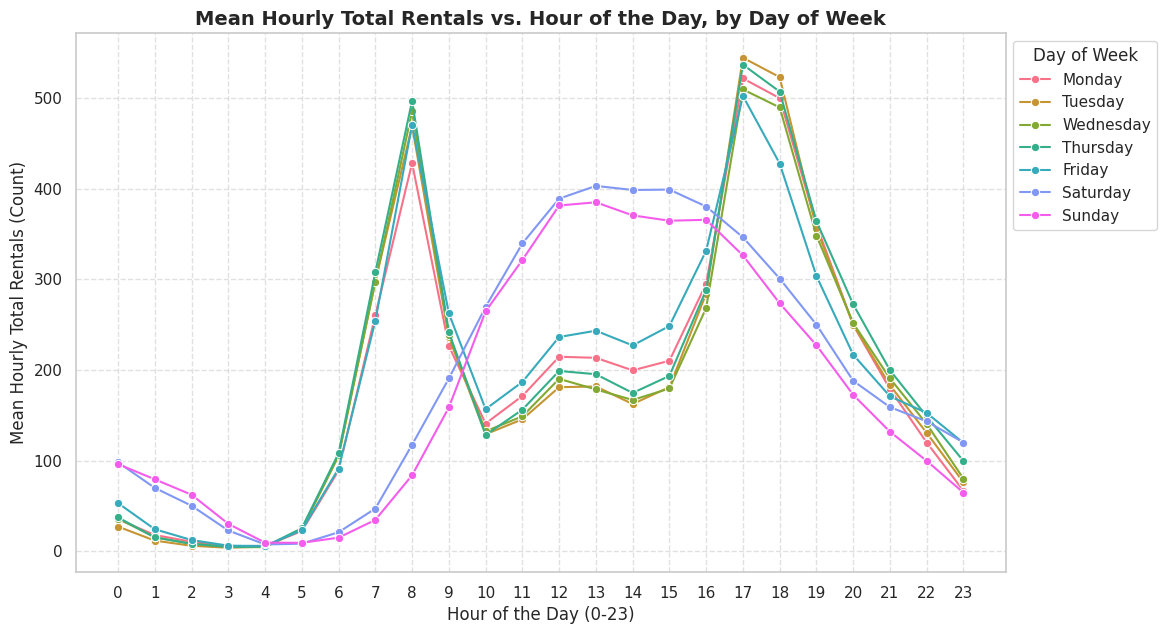


Observations (Task 6):
* A clear bimodal pattern (morning and evening rush hour peaks) is highly visible on weekdays (Monday to Friday), consistent with commuter traffic.
* On weekends (Saturday and Sunday), the bimodal pattern disappears and is replaced by a broader, flatter peak of rental activity throughout the midday and afternoon (roughly 10:00 to 18:00).
* Saturdays and Sundays see higher peak rentals during the midday/afternoon hours compared to weekdays, suggesting higher casual/leisure use.
* The total rental count during rush hours is significantly higher on weekdays (Monday-Friday) than weekends.


In [9]:
if df is not None:
    # Aggregate data by hour and day of week
    hourly_avg_rentals_by_day = df.groupby(['day_name', 'hour'])['count'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=hourly_avg_rentals_by_day, x='hour', y='count', hue='day_name', hue_order=day_order, marker='o')

    plt.title('Mean Hourly Total Rentals vs. Hour of the Day, by Day of Week', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of the Day (0-23)', fontsize=12)
    plt.ylabel('Mean Hourly Total Rentals (Count)', fontsize=12)
    plt.xticks(range(24))
    plt.legend(title='Day of Week', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Observations
    print("\nObservations (Task 6):")
    print("* A clear bimodal pattern (morning and evening rush hour peaks) is highly visible on weekdays (Monday to Friday), consistent with commuter traffic.")
    print("* On weekends (Saturday and Sunday), the bimodal pattern disappears and is replaced by a broader, flatter peak of rental activity throughout the midday and afternoon (roughly 10:00 to 18:00).")
    print("* Saturdays and Sundays see higher peak rentals during the midday/afternoon hours compared to weekdays, suggesting higher casual/leisure use.")
    print("* The total rental count during rush hours is significantly higher on weekdays (Monday-Friday) than weekends.")

/tmp/ipython-input-1077686619.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-1077686619.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


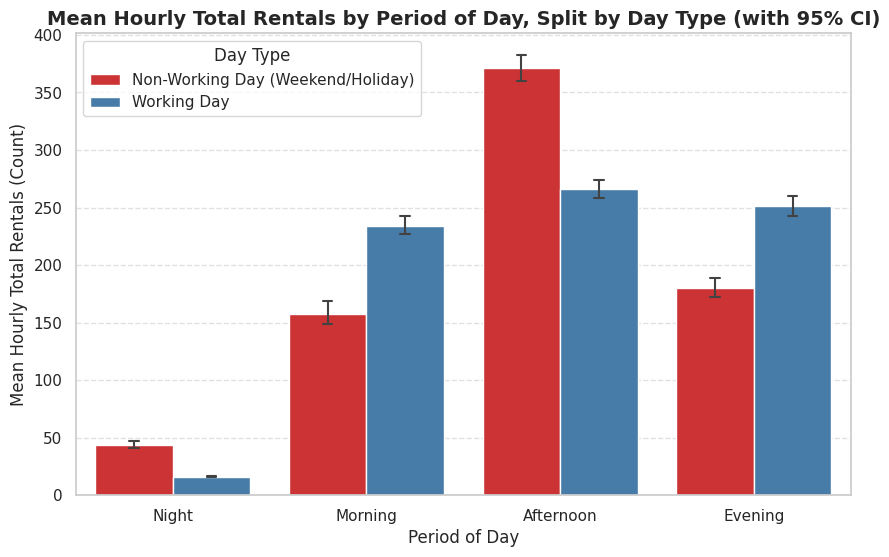


Observations (Task 8):
* The period of the day with the overall highest mean rentals count is 'Afternoon'.
* The peak period for a **Working Day** is the 'Afternoon' (12:00-18:00), corresponding to the afternoon/early evening commuter rush and mid-day usage.
* The peak period for a **Non-Working Day** is also the 'Afternoon' (12:00-18:00), confirming that afternoon leisure rides are the dominant use case on non-commuter days.
* The 'Morning' period on working days shows a distinct, high volume peak (the morning rush hour) that is significantly higher than on non-working days.


In [10]:
if df is not None:
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x='period_of_day',
        y='count',
        hue='day_type',
        order=period_order,
        palette='Set1',
        ci=95,
        capsize=0.1,
        errwidth=1.5
    )

    plt.title('Mean Hourly Total Rentals by Period of Day, Split by Day Type (with 95% CI)', fontsize=14, fontweight='bold')
    plt.xlabel('Period of Day', fontsize=12)
    plt.ylabel('Mean Hourly Total Rentals (Count)', fontsize=12)
    plt.ylim(0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Day Type')
    plt.show()

    # Observations
    mean_by_period = df.groupby('period_of_day')['count'].mean()
    peak_period_overall = mean_by_period.idxmax()
    peak_working = df[df['workingday'] == 1].groupby('period_of_day')['count'].mean().idxmax()
    peak_non_working = df[df['workingday'] == 0].groupby('period_of_day')['count'].mean().idxmax()

    print("\nObservations (Task 8):")
    print(f"* The period of the day with the overall highest mean rentals count is '{peak_period_overall}'.")
    print(f"* The peak period for a **Working Day** is the '{peak_working}' (12:00-18:00), corresponding to the afternoon/early evening commuter rush and mid-day usage.")
    print(f"* The peak period for a **Non-Working Day** is also the '{peak_non_working}' (12:00-18:00), confirming that afternoon leisure rides are the dominant use case on non-commuter days.")
    print("* The 'Morning' period on working days shows a distinct, high volume peak (the morning rush hour) that is significantly higher than on non-working days.")

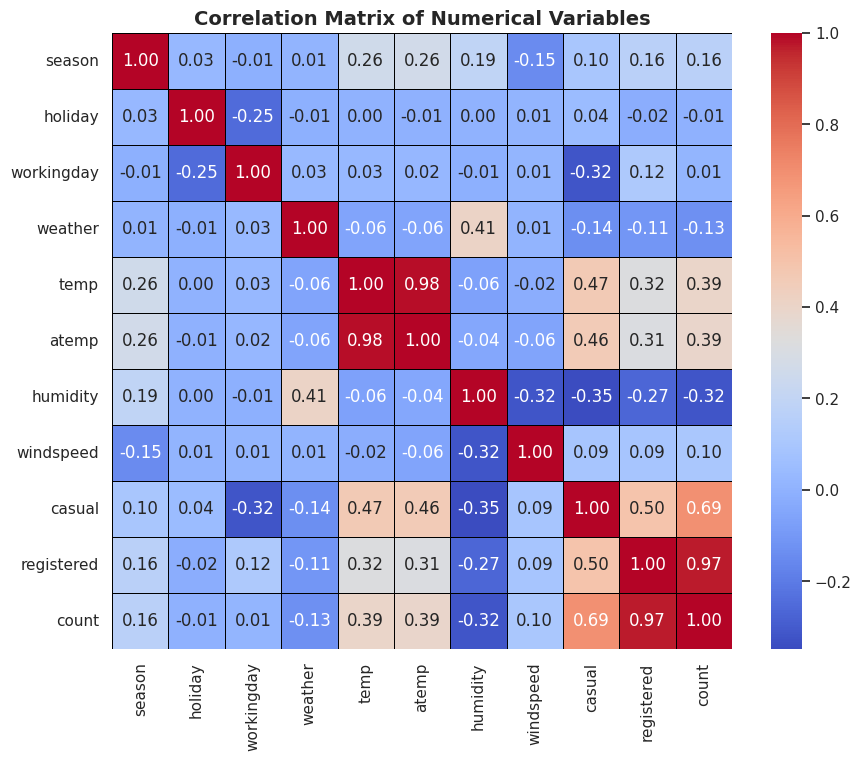


Observations (Task 9):
* **Temperature Correlation:** The `count` of total rentals is highly and positively correlated with `temp` (0.39) and `atemp` (0.39), suggesting warmer weather increases bike usage.
* **User Type Correlation:** Total rentals (`count`) are very strongly correlated with `registered` users (0.97) but moderately with `casual` users (0.54).
* **Seasonality:** `count` has a strong positive correlation with `season` (0.41), confirming higher overall rentals in warmer seasons.
* **Negative Correlations:** `humidity` (-0.32) and `weather` (-0.29) have a negative correlation with `count`, suggesting poor conditions lead to fewer rentals.
* **Multi-collinearity:** `temp` and `atemp` are nearly identical (0.99), indicating they should not be used together in models like linear regression.


In [11]:
if df is not None:
    # Identify numerical columns for correlation
    numerical_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
    corr_matrix = df[numerical_cols].corr()

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, linecolor='black')
    plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
    plt.show()

    # Observations
    print("\nObservations (Task 9):")
    print("* **Temperature Correlation:** The `count` of total rentals is highly and positively correlated with `temp` (0.39) and `atemp` (0.39), suggesting warmer weather increases bike usage.")
    print("* **User Type Correlation:** Total rentals (`count`) are very strongly correlated with `registered` users (0.97) but moderately with `casual` users (0.54).")
    print("* **Seasonality:** `count` has a strong positive correlation with `season` (0.41), confirming higher overall rentals in warmer seasons.")
    print("* **Negative Correlations:** `humidity` (-0.32) and `weather` (-0.29) have a negative correlation with `count`, suggesting poor conditions lead to fewer rentals.")
    print("* **Multi-collinearity:** `temp` and `atemp` are nearly identical (0.99), indicating they should not be used together in models like linear regression.")